##Real Estate Price Prediction

##importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Real estate.csv')

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.shape

(414, 8)

##EXploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

X1 transaction date


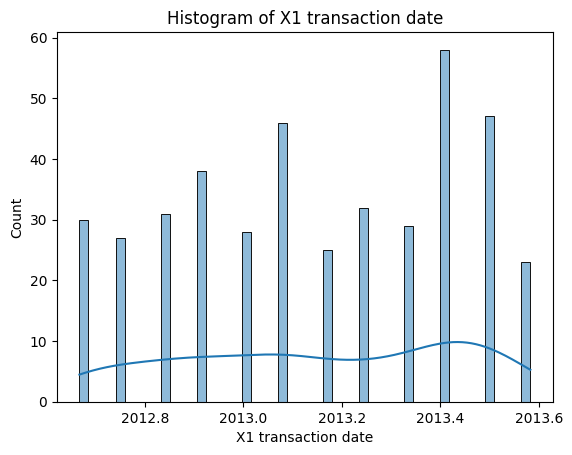

X2 house age


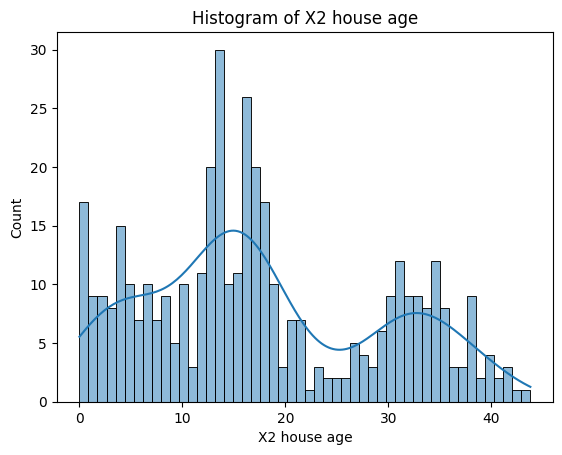

X3 distance to the nearest MRT station


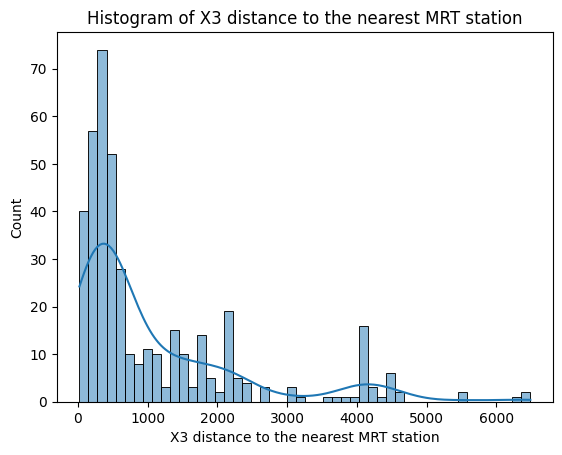

X4 number of convenience stores


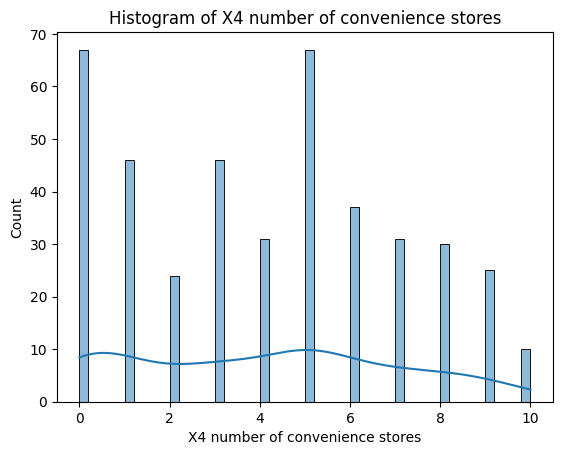

X5 latitude


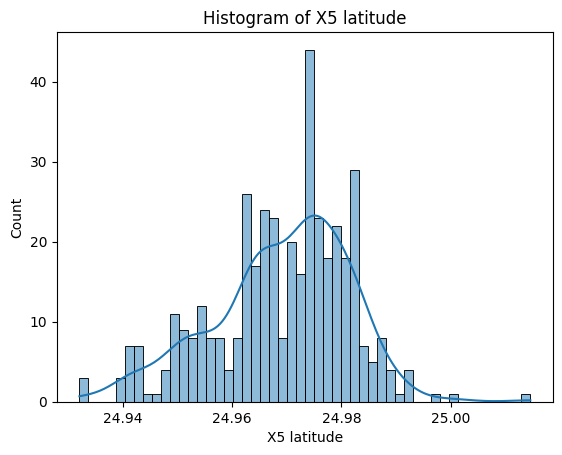

X6 longitude


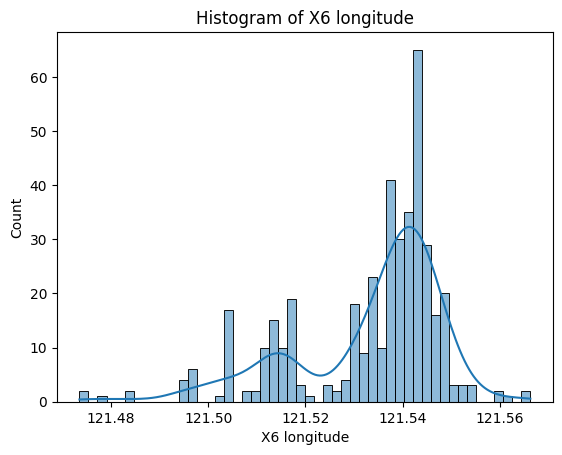

Y house price of unit area


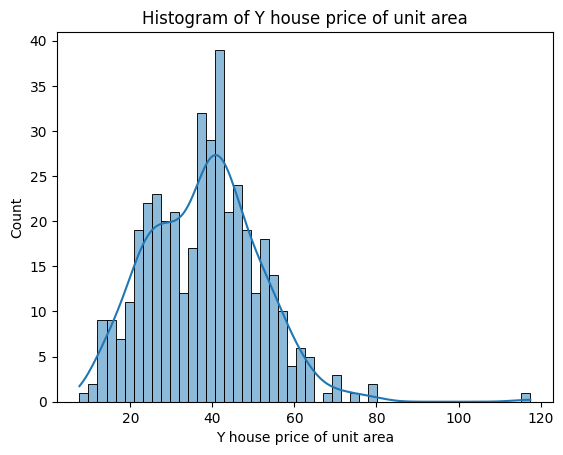

In [ ]:
for col in df.columns[1:]:
    print(col)
    sns.histplot(df[col],bins=50,kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()


Kernel density estimation is a non-parametric way to estimate the probability density function of a random variable. In simpler terms, it's a way to estimate the shape of the distribution of your data without making assumptions about the specific form of the distribution (like assuming it follows a normal distribution).

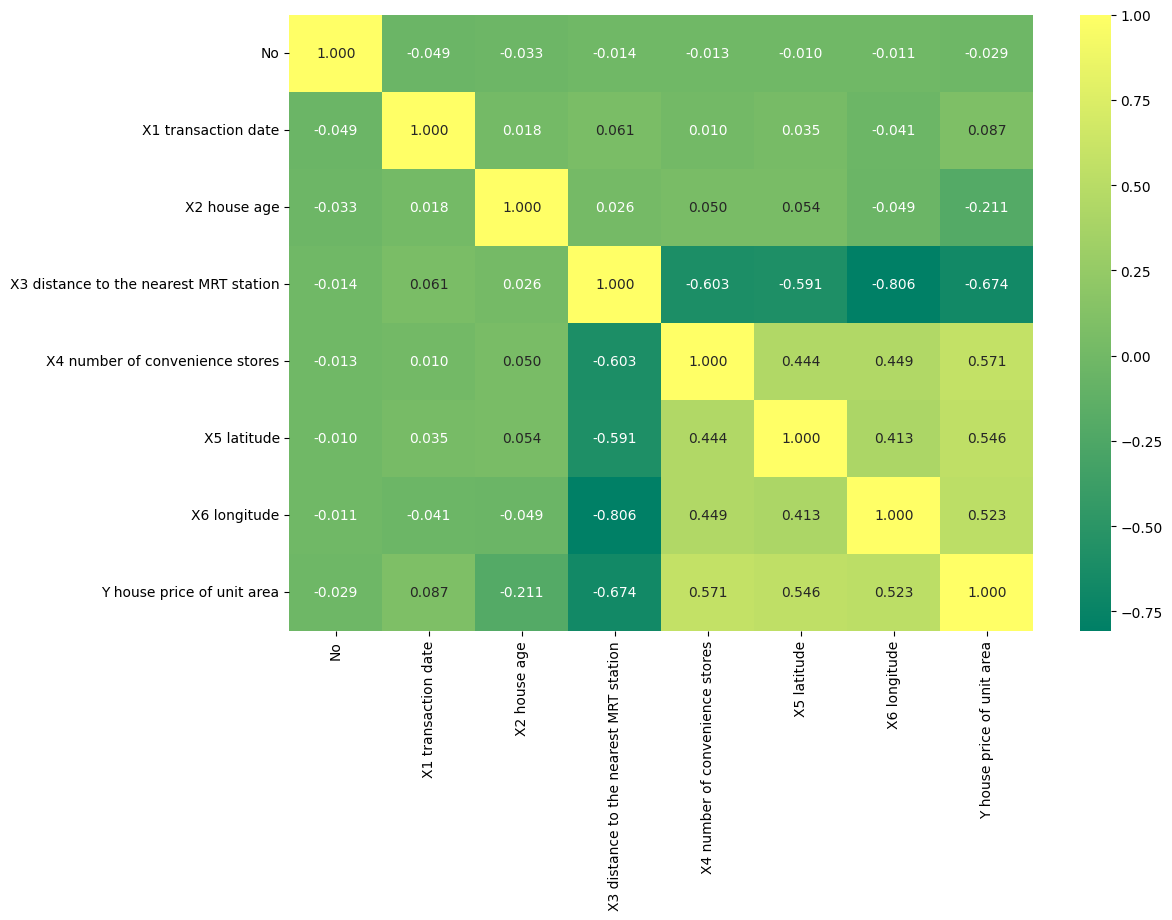

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="summer", annot=True, fmt='.3f',annot_kws={"size": 10})
plt.show()

In [ ]:
df.corr()["Y house price of unit area"]

No                                       -0.028587
X1 transaction date                       0.087491
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64

##Model Building

In [ ]:
x=df.drop(['Y house price of unit area', 'No'], axis=1)
y=df['Y house price of unit area']

In [ ]:
x.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
5,2012.667,7.1,2175.03000,3,24.96305,121.51254
6,2012.667,34.5,623.47310,7,24.97933,121.53642
7,2013.417,20.3,287.60250,6,24.98042,121.54228
8,2013.500,31.7,5512.03800,1,24.95095,121.48458
9,2013.417,17.9,1783.18000,3,24.96731,121.51486


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [ ]:
x_train.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
114,2012.667,30.6,143.83830,8,24.98155,121.54142
25,2013.083,29.3,1487.86800,2,24.97542,121.51726
99,2013.417,6.4,90.45606,9,24.97433,121.54310
90,2012.833,0.0,274.01440,1,24.97480,121.53059
230,2013.500,4.0,2147.37600,3,24.96299,121.51284
364,2013.417,35.3,614.13940,7,24.97913,121.53666
181,2013.167,11.6,201.89390,8,24.98489,121.54121
146,2012.750,0.0,185.42960,0,24.97110,121.53170
48,2013.417,24.2,4605.74900,0,24.94684,121.49578
191,2013.167,13.2,750.07040,2,24.97371,121.54951


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
pd.DataFrame(reg.coef_, x.columns, columns=['coefficient'])

,coefficient
X1 transaction date,4.638521
X2 house age,-0.254850
X3 distance to the nearest MRT station,-0.005068
X4 number of convenience stores,1.065967
X5 latitude,246.785307
X6 longitude,-52.648118


Here's a breakdown of what each coefficient means:

X1 transaction date: For each unit increase in transaction date, the predicted target variable increases by approximately 4.64 units.

X2 house age: For each unit increase in house age, the predicted target variable decreases by approximately 0.25 units.

X3 distance to the nearest MRT station: For each unit increase in distance to the nearest MRT station, the predicted target variable decreases by approximately 0.005 units.

X4 number of convenience stores: For each unit increase in the number of convenience stores, the predicted target variable increases by approximately 1.07 units.

X5 latitude: For each unit increase in latitude, the predicted target variable increases by approximately 246.79 units.

X6 longitude: For each unit increase in longitude, the predicted target variable decreases by approximately 52.65 units.

These coefficients indicate how much each feature contributes to the predicted outcome. Positive coefficients indicate a positive relationship with the target variable, whereas negative coefficients indicate a negative relationship. The magnitude of the coefficient indicates the strength of the relationship.

In [ ]:
df['Y house price of unit area'].value_counts()

42.5    4
40.3    4
29.3    4
40.6    4
37.4    4
       ..
55.9    1
22.9    1
21.5    1
55.1    1
63.9    1
Name: Y house price of unit area, Length: 270, dtype: int64

In [ ]:
y_predict = reg.predict(x_test)
pd.DataFrame({'Test':y_test, 'Prediction':y_predict}).head(10)

,Test,Prediction
150,48.5,40.784905
269,23.0,32.208973
89,25.3,15.942830
403,39.7,45.697886
115,46.4,38.820431
310,24.7,30.733054
227,40.2,44.150564
160,57.8,47.242472
272,40.5,40.291484
349,47.0,43.798899


This code snippet performs predictions using the trained linear regression model (`reg`) on the testing data (`x_test`) and then compares these predictions with the actual target values (`y_test`). Here's a breakdown of what each line does:

1. **Prediction**: `y_predict = reg.predict(x_test)`
   - Using the `predict()` method of the trained linear regression model (`reg`), predictions are made on the testing data (`x_test`). This generates predicted values (`y_predict`) for the target variable based on the features in the testing dataset.

2. **Creating DataFrame for Comparison**:

   - This creates a DataFrame with two columns: 'Test' and 'Prediction'.
   - The 'Test' column contains the actual target values (`y_test`) from the testing dataset.
   - The 'Prediction' column contains the predicted values (`y_predict`) generated by the model.
   - `.head(10)` is used to display the first 10 rows of the DataFrame.

This DataFrame allows you to visually compare the actual target values with the predicted values for the testing dataset. It provides insight into how well the model is performing on unseen data. Ideally, the predicted values should closely match the actual values, indicating that the model is generalizing well to new observations.

In [ ]:
df['Y house price of unit area'].mean()

37.980193236714975

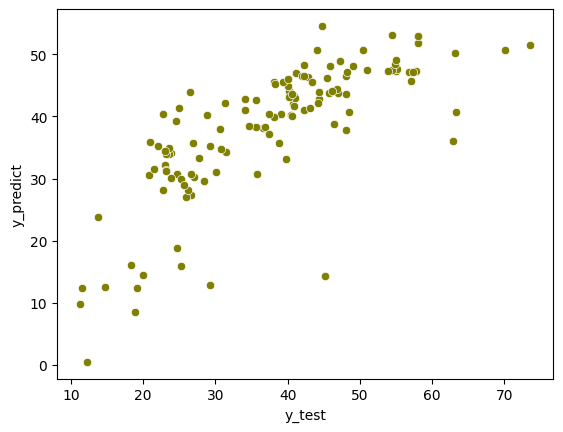

In [ ]:
residuals = y_test-y_predict
sns.scatterplot(x=y_test, y=y_predict, color='olive')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()


The provided code creates a scatter plot where the x-axis represents the actual target values (`y_test`) and the y-axis represents the predicted values (`y_predict`) from a linear regression model. Each point on the plot represents an observation in the testing dataset.

Additionally, the residuals (differences between actual and predicted values) are calculated (`residuals = y_test - y_predict`) but not explicitly used in the scatter plot. Instead, the scatter plot serves as a visual tool to assess the relationship between the actual and predicted values.

Ideally, the points on the plot should align closely to a diagonal line, indicating that the predictions closely match the actual values. Any deviations from this line suggest areas where the model may be performing well or poorly.

The color of the points on the scatter plot is set to 'olive' for better visualization, and labels are added to the x-axis and y-axis to indicate the variables being plotted.

<Axes: xlabel='Y house price of unit area', ylabel='Density'>

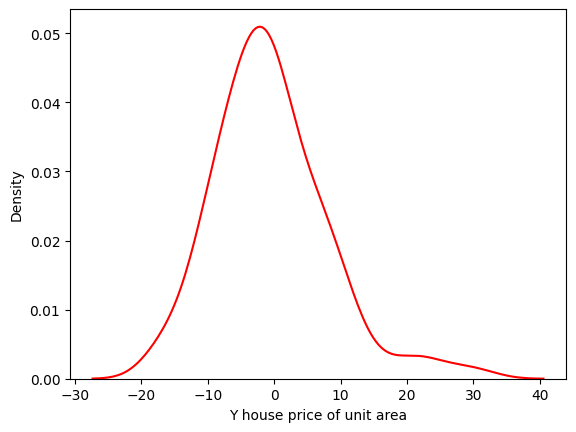

In [ ]:
sns.distplot(residuals, color='r', hist=False)

Analyzing the distribution plot of residuals from a linear regression model allows you to assess:

1. Normality: Whether the residuals are normally distributed.
2. Bias and Variability: Central tendency and spread of residuals, indicating bias and uncertainty in predictions.
3. Outliers and Skewness: Presence of extreme values or asymmetry in residuals.
4. Heteroscedasticity: Unequal spread of residuals, suggesting variability in errors across predicted values.

This analysis helps evaluate model assumptions, identify areas for improvement, and assess prediction reliability.

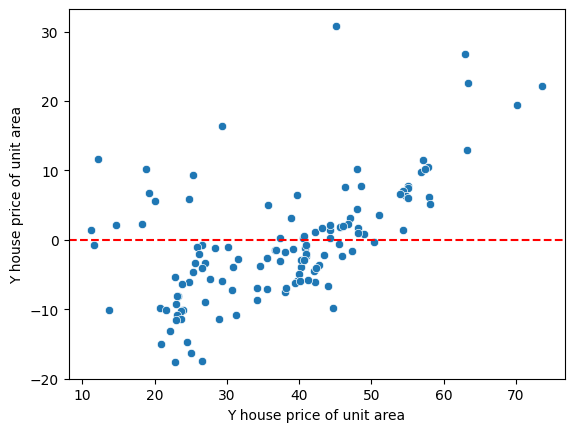

In [ ]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', ls='--')

The x-axis represents the actual target values (y_test).
The y-axis represents the residuals (the differences between the actual and predicted values).
The red dashed line at y=0 represents the line where residuals are exactly zero. Points above this line indicate overestimation by the model, while points below indicate underestimation.
This plot can help you identify any patterns or trends in the residuals, such as heteroscedasticity or non-linearity, which may suggest areas for improvement in your model.

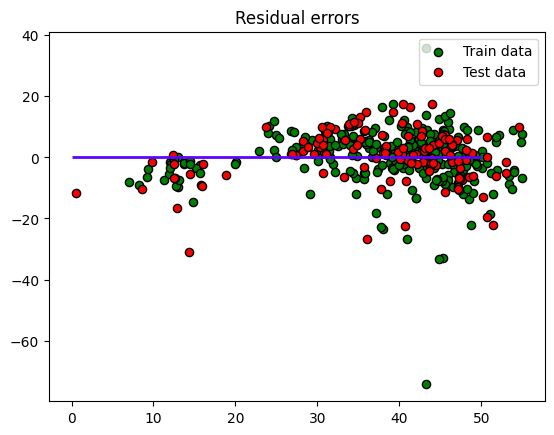

In [ ]:
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train, color = "green", s = 35, edgecolor='black', label = 'Train data')
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test, color = "red", s = 35, edgecolor='black', label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, colors='#5e03fc', linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_predict, y_test)
MSE = metrics.mean_squared_error(y_predict, y_test)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,6.485337
MSE,72.908600
RMSE,8.538653


Determining whether a model is good or not depends on various factors, including the context of your problem, the specific requirements of your application, and the performance of other models you've tried.

1. **Mean Absolute Error (MAE)**: With an MAE of 6.485337, it means, on average, model's predictions are off by approximately 6.49 units from the actual values.

2. **Mean Squared Error (MSE)**: The MSE of 72.908600 indicates the average squared difference between your model's predictions and the actual values. Since MSE squares errors, it's more sensitive to outliers.

3. **Root Mean Squared Error (RMSE)**: The RMSE of 8.538653 provides a more interpretable measure of error, as it's in the same units as the target variable. Lower values of RMSE indicate better performance. An RMSE of 8.54 suggests that, on average, your model's predictions deviate from the actual values by approximately 8.54 units.



In [ ]:
import pickle
pickle_out = open("reg.pkl","wb")
pickle.dump(reg, pickle_out)
pickle_out.close()